## Project 3 - DATA 201: Logistic Regression / Hye Young Park

In [416]:
%matplotlib inline
import numpy as np
import scipy.stats as stats
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import sklearn


#### - Load the CSV File, view it and check the type and information.
- Referrence: Chess Game Dataset(Lichess) from Kaggle - https://www.kaggle.com/datasnaek/chess

In [417]:
data = pd.read_csv('C:/Users/illya/Desktop/DATA 201 - Fall 2019/Project 3/chess/games.csv')
print(data.head(10))
print(data.tail(10))
type(data)
data.info()

         id  rated    created_at  last_move_at  turns victory_status winner  \
0  TZJHLljE  False  1.504210e+12  1.504210e+12     13      outoftime  white   
1  l1NXvwaE   True  1.504130e+12  1.504130e+12     16         resign  black   
2  mIICvQHh   True  1.504130e+12  1.504130e+12     61           mate  white   
3  kWKvrqYL   True  1.504110e+12  1.504110e+12     61           mate  white   
4  9tXo1AUZ   True  1.504030e+12  1.504030e+12     95           mate  white   
5  MsoDV9wj  False  1.504240e+12  1.504240e+12      5           draw   draw   
6  qwU9rasv   True  1.504230e+12  1.504230e+12     33         resign  white   
7  RVN0N3VK  False  1.503680e+12  1.503680e+12      9         resign  black   
8  dwF3DJHO   True  1.503510e+12  1.503510e+12     66         resign  black   
9  afoMwnLg   True  1.503440e+12  1.503440e+12    119           mate  white   

  increment_code            white_id  white_rating            black_id  \
0           15+2            bourgris          1500      

In [418]:
data.shape

(20058, 16)

### - Prepare and wrangle the dataset

In [419]:
data1 = data.dropna()
data1.shape

(20058, 16)

In [420]:
data1.head(3)

,id,rated,created_at,last_move_at,turns,victory_status,winner,increment_code,white_id,white_rating,black_id,black_rating,moves,opening_eco,opening_name,opening_ply
0,TZJHLljE,False,1.504210e+12,1.504210e+12,13,outoftime,white,15+2,bourgris,1500,a-00,1191,d4 d5 c4 c6 cxd5 e6 dxe6 fxe6 Nf3 Bb4+ Nc3 Ba5...,D10,Slav Defense: Exchange Variation,5
1,l1NXvwaE,True,1.504130e+12,1.504130e+12,16,resign,black,5+10,a-00,1322,skinnerua,1261,d4 Nc6 e4 e5 f4 f6 dxe5 fxe5 fxe5 Nxe5 Qd4 Nc6...,B00,Nimzowitsch Defense: Kennedy Variation,4
2,mIICvQHh,True,1.504130e+12,1.504130e+12,61,mate,white,5+10,ischia,1496,a-00,1500,e4 e5 d3 d6 Be3 c6 Be2 b5 Nd2 a5 a4 c5 axb5 Nc...,C20,King's Pawn Game: Leonardis Variation,3


In [421]:
data1.drop(data.iloc[:, 2:4], axis=1,inplace=True)

In [422]:
data1.head(3)

,id,rated,turns,victory_status,winner,increment_code,white_id,white_rating,black_id,black_rating,moves,opening_eco,opening_name,opening_ply
0,TZJHLljE,False,13,outoftime,white,15+2,bourgris,1500,a-00,1191,d4 d5 c4 c6 cxd5 e6 dxe6 fxe6 Nf3 Bb4+ Nc3 Ba5...,D10,Slav Defense: Exchange Variation,5
1,l1NXvwaE,True,16,resign,black,5+10,a-00,1322,skinnerua,1261,d4 Nc6 e4 e5 f4 f6 dxe5 fxe5 fxe5 Nxe5 Qd4 Nc6...,B00,Nimzowitsch Defense: Kennedy Variation,4
2,mIICvQHh,True,61,mate,white,5+10,ischia,1496,a-00,1500,e4 e5 d3 d6 Be3 c6 Be2 b5 Nd2 a5 a4 c5 axb5 Nc...,C20,King's Pawn Game: Leonardis Variation,3


### - Using a bar chart to visualize the data

  victory_status   size
0           draw    906
1           mate   6325
2      outoftime   1680
3         resign  11147


<function matplotlib.pyplot.show(*args, **kw)>

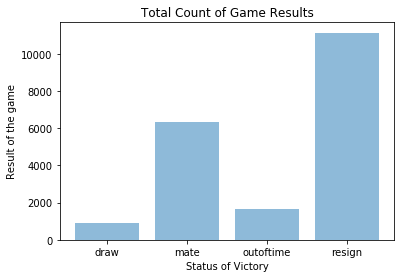

In [423]:
grouped = data1.groupby('victory_status').size()
grouped.head()
datavic = grouped.to_frame(name = 'size').reset_index()
print(datavic)
y_pos = np.arange(len(datavic['victory_status']))
count = datavic['size']
plt.bar(y_pos, count, align='center', alpha=0.5)
plt.xticks(y_pos, datavic['victory_status'])
plt.xlabel('Status of Victory')
plt.ylabel('Result of the game')
plt.title("Total Count of Game Results")
plt.show

## One vs. One and One vs. all
to train, test and predict a categorical variable and the probability(accuracy)

### 1. One vs. One (OVO): win or lose

In [424]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
from sklearn import preprocessing
import pandas as pd
import seaborn as sn

In [425]:
##trying to predict winner based on victory status and opening name
datawin = data1[['winner', 'victory_status', 'opening_name']]
##get rid of draws to make winner a binary result (black, or white)
datawin1 = datawin[datawin.winner != 'draw']
datawin1.head(3)


,winner,victory_status,opening_name
0,white,outoftime,Slav Defense: Exchange Variation
1,black,resign,Nimzowitsch Defense: Kennedy Variation
2,white,mate,King's Pawn Game: Leonardis Variation


In [426]:
##encode categorical values so that we can use them in logistic regression training
df_2 = pd.get_dummies(datawin1, columns=['victory_status', 'opening_name'])
df_2.head(3)

,winner,victory_status_mate,victory_status_outoftime,victory_status_resign,opening_name_Alekhine Defense,opening_name_Alekhine Defense #2,opening_name_Alekhine Defense #3,opening_name_Alekhine Defense: Balogh Variation,opening_name_Alekhine Defense: Brooklyn Variation,opening_name_Alekhine Defense: Exchange Variation,...,opening_name_Zukertort Opening: Quiet System,opening_name_Zukertort Opening: Reversed Mexican Defense,opening_name_Zukertort Opening: Ross Gambit,opening_name_Zukertort Opening: Santasiere's Folly,opening_name_Zukertort Opening: Sicilian Invitation,opening_name_Zukertort Opening: Slav Invitation,opening_name_Zukertort Opening: Tennison Gambit,opening_name_Zukertort Opening: The Walrus,opening_name_Zukertort Opening: Vos Gambit,opening_name_Zukertort Opening: Wade Defense
0,white,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,black,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,white,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [427]:
##make the "white" or "black" winner values 1 or 0 (1 = white, 0 = black)
for i in df_2.index:
    df_2.at[i, 'winner'] = 1 if df_2.at[i, 'winner'] == 'white' else 0 
df_2.head()

,winner,victory_status_mate,victory_status_outoftime,victory_status_resign,opening_name_Alekhine Defense,opening_name_Alekhine Defense #2,opening_name_Alekhine Defense #3,opening_name_Alekhine Defense: Balogh Variation,opening_name_Alekhine Defense: Brooklyn Variation,opening_name_Alekhine Defense: Exchange Variation,...,opening_name_Zukertort Opening: Quiet System,opening_name_Zukertort Opening: Reversed Mexican Defense,opening_name_Zukertort Opening: Ross Gambit,opening_name_Zukertort Opening: Santasiere's Folly,opening_name_Zukertort Opening: Sicilian Invitation,opening_name_Zukertort Opening: Slav Invitation,opening_name_Zukertort Opening: Tennison Gambit,opening_name_Zukertort Opening: The Walrus,opening_name_Zukertort Opening: Vos Gambit,opening_name_Zukertort Opening: Wade Defense
0,1,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,1,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,1,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [428]:
# input (all columns except winner)
x = df_2.iloc[:,1:].values 
# output (winner)
y = df_2.iloc[:, 0].values 
y = y.astype(int)         #this was an object and classifier expected an int type

In [429]:
xtrain, xtest, ytrain, ytest = train_test_split(x, y, test_size = 0.25, random_state = 0) 


In [430]:
##predict the classes of the data
classifier = LogisticRegression(random_state = 0) 
classifier.fit(xtrain, ytrain)
print( 'One vs one accuracy: %.3f' % classifier.score(x,y) )
y_pred = classifier.predict(xtest)


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


One vs one accuracy: 0.609


In [431]:
from sklearn.metrics import confusion_matrix
confusion_matrix = confusion_matrix(ytest, y_pred)
confusion_matrix
##the results from the confusion matrix are telling us that 1063 and 1570 are the number of correct predictions. 
##1223 and 921 are the number of incorrect predictions.

array([[1063, 1223],
       [ 921, 1570]], dtype=int64)

In [432]:
from sklearn.metrics import classification_report
print(classification_report(ytest, y_pred))
#we can see the probabilities here in the accuracy portion of the table

              precision    recall  f1-score   support

           0       0.54      0.47      0.50      2286
           1       0.56      0.63      0.59      2491

    accuracy                           0.55      4777
   macro avg       0.55      0.55      0.55      4777
weighted avg       0.55      0.55      0.55      4777



### 2. One vs. Rest(OVR): the results of the game

In [433]:
##trying to predict winner based on victory status and opening name
datawin = data1[['winner', 'victory_status', 'opening_name']]
datawin.head(3)

,winner,victory_status,opening_name
0,white,outoftime,Slav Defense: Exchange Variation
1,black,resign,Nimzowitsch Defense: Kennedy Variation
2,white,mate,King's Pawn Game: Leonardis Variation


In [434]:
##encode categorical values so that we can use them in logistic regression training
df_3 = pd.get_dummies(datawin, columns=['winner', 'opening_name'])
df_3.head()

,victory_status,winner_black,winner_draw,winner_white,opening_name_Alekhine Defense,opening_name_Alekhine Defense #2,opening_name_Alekhine Defense #3,opening_name_Alekhine Defense: Balogh Variation,opening_name_Alekhine Defense: Brooklyn Variation,opening_name_Alekhine Defense: Exchange Variation,...,opening_name_Zukertort Opening: Quiet System,opening_name_Zukertort Opening: Reversed Mexican Defense,opening_name_Zukertort Opening: Ross Gambit,opening_name_Zukertort Opening: Santasiere's Folly,opening_name_Zukertort Opening: Sicilian Invitation,opening_name_Zukertort Opening: Slav Invitation,opening_name_Zukertort Opening: Tennison Gambit,opening_name_Zukertort Opening: The Walrus,opening_name_Zukertort Opening: Vos Gambit,opening_name_Zukertort Opening: Wade Defense
0,outoftime,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,resign,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,mate,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,mate,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,mate,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [435]:
##make the "white" or "black" winner values 1 or 0 (1 = white, 0 = black)
for i in df_3.index:
    if df_3.at[i, 'victory_status'] == "outoftime":
        df_3.at[i, 'victory_status'] = 1
    elif df_3.at[i, 'victory_status'] == 'resign':
        df_3.at[i, 'victory_status'] = 2
    elif df_3.at[i, 'victory_status'] == 'mate':
        df_3.at[i, 'victory_status'] = 3
    else:                                            #draw
        df_3.at[i, 'victory_status'] = 4;

df_3.head()

,victory_status,winner_black,winner_draw,winner_white,opening_name_Alekhine Defense,opening_name_Alekhine Defense #2,opening_name_Alekhine Defense #3,opening_name_Alekhine Defense: Balogh Variation,opening_name_Alekhine Defense: Brooklyn Variation,opening_name_Alekhine Defense: Exchange Variation,...,opening_name_Zukertort Opening: Quiet System,opening_name_Zukertort Opening: Reversed Mexican Defense,opening_name_Zukertort Opening: Ross Gambit,opening_name_Zukertort Opening: Santasiere's Folly,opening_name_Zukertort Opening: Sicilian Invitation,opening_name_Zukertort Opening: Slav Invitation,opening_name_Zukertort Opening: Tennison Gambit,opening_name_Zukertort Opening: The Walrus,opening_name_Zukertort Opening: Vos Gambit,opening_name_Zukertort Opening: Wade Defense
0,1,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,2,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,3,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,3,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,3,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [436]:
# input (all columns except victory status)
x = df_3.iloc[:,1:].values 
# output (victory status)
y = df_3.iloc[:, 0].values 
y = y.astype(int)

In [437]:
xtrain, xtest, ytrain, ytest = train_test_split(x, y, test_size = 0.25, random_state = 0)

In [438]:
##predict the classes of the data
classifier = LogisticRegression(random_state = 0) 

classifier.fit(xtrain, ytrain)
print( 'One vs rest accuracy: %.3f' % classifier.score(x,y) ) #probability/accuracy
y_pred = classifier.predict(xtest)


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


One vs rest accuracy: 0.613


In [439]:
from sklearn.metrics import confusion_matrix
confusion_matrix = confusion_matrix(ytest, y_pred)
confusion_matrix
#1 outoftime - 0/402 correct predictions for outoftime
#2 resign - 2638/2827 correct predictions for resign
#3 mate - 172/1571 correct predictions for mate
# draw - 215/215 (100%) correct predictions for draw

array([[   0,  362,   33,    7],
       [   0, 2638,  189,    0],
       [   0, 1399,  172,    0],
       [   0,    0,    0,  215]], dtype=int64)

In [440]:
from sklearn.metrics import classification_report
print(classification_report(ytest, y_pred))

              precision    recall  f1-score   support

           1       0.00      0.00      0.00       402
           2       0.60      0.93      0.73      2827
           3       0.44      0.11      0.18      1571
           4       0.97      1.00      0.98       215

    accuracy                           0.60      5015
   macro avg       0.50      0.51      0.47      5015
weighted avg       0.52      0.60      0.51      5015



C:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


### - Summary

- The goal to use this dataset is to see how we predict the winner or victory result by checking out the variables: 'winner', 'victory_status', and 'opening_name'. The accuracy of OVR is 61.3% while the accuracy of OVO is 61.7% (I didn't use the OVO and OVR classifiers, just the regular logistics regression classifier). Even though the accuracy for both logistic regressions is more than 50%, the accuracy, overall, is not high. That means Chess game outcomes are difficult to predict based on the variables we chose.